 # Problem a

In [48]:
import numpy as np


In [49]:
from sklearn.datasets import fetch_20newsgroups
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
#overall_data = fetch_20newsgroups(subset='test')

PLOTTING

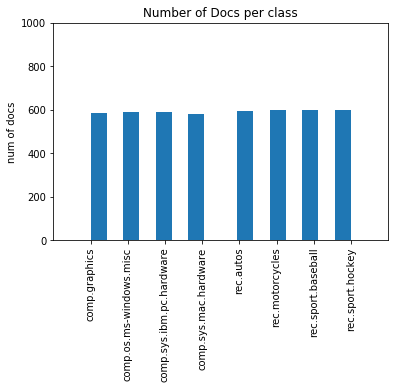

In [46]:
import matplotlib.pyplot as plt
plt.hist(twenty_train.target, bins = 16, align = 'mid')
plt.title('Number of Docs per class')
plt.ylabel('num of docs')
plt.xticks(range(8),categories,rotation = 90)
plt.xlim([-1,8])
plt.ylim([0,1000])

plt.show()


# Problem b

TOKENIZER

In [55]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction import text

import nltk
import string
import re

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def tokenizer_stem(text):
    edited_text = text
    edited_text = re.sub('[,.-:/()?{}*$#&]',' ',edited_text)  #remove symbols
    edited_text = ''.join([ch for ch in edited_text if ch not in string.punctuation]) #remove punctuation
    edited_text = "".join(ch for ch in edited_text if ord(ch) < 128) # remove non-ascii characters
    tokens = edited_text.split()
    stemmed_tokens = [stemmer.stem(n) for n in tokens]
    return stemmed_tokens

stop_words = text.ENGLISH_STOP_WORDS

count_vectorizer_min_df_2 = CountVectorizer(analyzer = 'word', tokenizer = tokenizer_stem,
                                            stop_words = stop_words,min_df = 2)
count_vectorizer_min_df_5 = CountVectorizer(analyzer = 'word', tokenizer = tokenizer_stem,
                                            stop_words = stop_words,min_df = 5)

count_min_df_2 = count_vectorizer_min_df_2.fit_transform(twenty_train.data)
count_min_df_5 = count_vectorizer_min_df_5.fit_transform(twenty_train.data)

print ("Final Number of Terms Extracted :" + str(count_min_df_2.shape[1]))
print ("Final Number of Terms Extracted :" + str(count_min_df_5.shape[1]))

    
    



Final Number of Terms Extracted :21895
Final Number of Terms Extracted :9109


TFIDF

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
twenty_train_tfidf_min_df_2 = tfidf_transformer.fit_transform(count_min_df_2)
twenty_train_tfidf_min_df_5 = tfidf_transformer.fit_transform(count_min_df_5)
